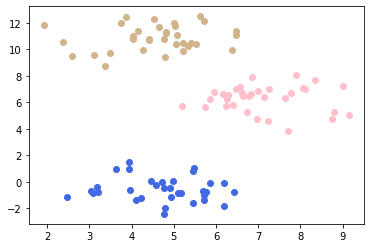

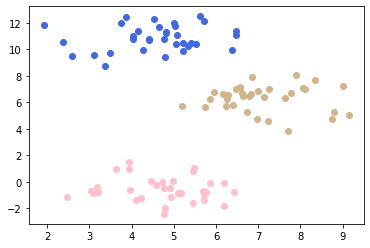

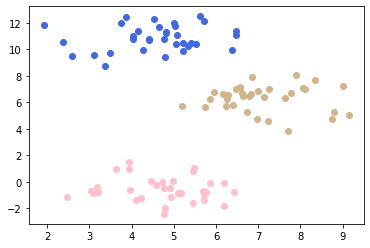

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
# 1a
def make_blobs(n_samples=100, n_features=2, n_centers=2):
    if(n_samples < 100 or n_features < 2 or n_centers < 2):
        #print("min values not satisfied")
        return None
    
    centers = rd_(n_features)*10
    for i, center in enumerate(range(n_centers-1)):
        centers = centers[i] + np.append(centers, rd_(n_features)*10-5, axis=0)
    
    #print(centers)
    
    neighbors = np.zeros((n_samples-n_centers, n_features))
    #print(neighbors.ndim)
    for sample in range(n_samples-n_centers):
        neighbors[sample] = centers[sample % n_centers] + np.random.default_rng().normal(1,1,(1, n_features))-1
        
    #print(neighbors)
    result = np.array(np.concatenate((centers, neighbors)))
     
    #if n_features == 2:
    #    plt.scatter(result[:,0], result[:,1])

    plt.show()    
    return result
        
def rd_(n_features):
    return np.random.default_rng().random((1, n_features))

make_blobs(1000, 2, 3)
make_blobs(0, 0, 0)#  -> min values not satisfied
make_blobs(1000, 10, 4)
make_blobs(10000, 3, 5)

# b
colors = ["royalblue", "pink", "tan"]

data = make_blobs(100, 2, 3)
blob = KMeans(3)
labels = blob.fit_predict(data)
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color = colors[labels[i]])
plt.show()
bob = AgglomerativeClustering(3)
labels = bob.fit_predict(data)
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color = colors[labels[i]])
plt.show()
hob = DBSCAN(1)
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color = colors[labels[i]])
plt.show()

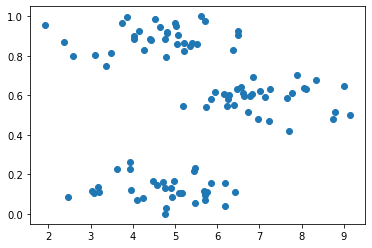

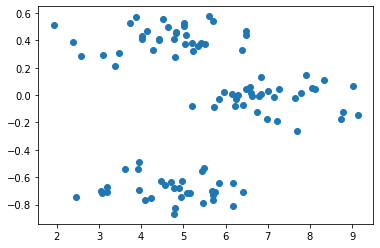

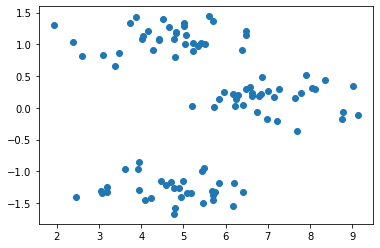

 - 


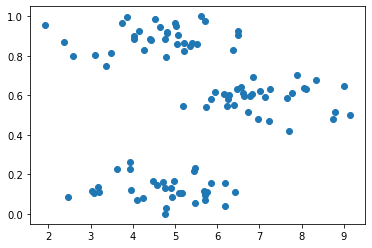

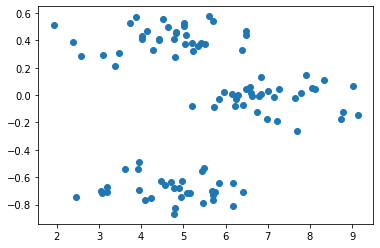

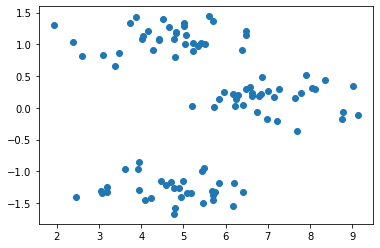

In [29]:
from numpy import quantile
import sklearn.preprocessing as prep

# 2a
def minmax(X):
    d = transform_(X)
    X, result, tempmin, tempmax = (d["X"], d["result"], d["tempmin"], d["tempmax"])
    for i, point in enumerate(X):
        result[i] = (point[0], (point[1] - tempmin) / (tempmax - tempmin))
    plot_(result)
    return result

# b
def robust(X):
    d = transform_(X)
    X, result, tempQ1, tempQ2, tempQ3 = (d["X"], d["result"], d["tempQ1"], d["tempQ2"], d["tempQ3"])
    for i, point in enumerate(X):
        result[i] = (point[0], (point[1] - tempQ2) / (tempQ3 - tempQ1))
    plot_(result)
    return result
    
# c
def standard(X):
    d = transform_(X)
    X, result, mean, stdd = (d["X"], d["result"], d["mean"], d["stdd"])
    for i, point in enumerate(X):
        result[i] = (point[0], (point[1] - mean) / stdd)
    plot_(result)
    return result

# helper
def transform_(X):
    d = {}
    d["X"] = np.array(X)
    d["result"] = np.zeros((len(X), X.ndim))
    d["tempmin"] = min(X[:,1])
    d["tempmax"] = max(X[:,1])
    #print(d["tempmin"],d["tempmax"])
    d["tempQ1"], d["tempQ2"], d["tempQ3"] = quantile(X[:,1], (0.25, 0.50, 0.75))
    #print(d["tempQ1"], d["tempQ2"])
    d["mean"] = np.mean(X[:,1]) # u
    d["stdd"] = np.std(X[:,1]) # s
    #print(d["mean"], d["stdd"])
    return d
    #return np.array([X, result, tempmin, tempmax, tempQ1, tempQ2, tempQ3, mean, stdd], dtype=object)

def plot_(X):
    plt.scatter(X[:,0], X[:,1])
    plt.show()

minmax(data)
robust(data)
standard(data)
print(" - ")

skminmax = prep.MinMaxScaler()
Yskminmax = skminmax.fit_transform(data)[:,1]
plt.scatter(data[:,0], Yskminmax)
plt.show()

skrobust = prep.RobustScaler()
Yskrobust = skrobust.fit_transform(data)[:,1]
plt.scatter(data[:,0], Yskrobust)
plt.show()

skstandard = prep.StandardScaler()
Yskstandard = skstandard.fit_transform(data)[:,1]
plt.scatter(data[:,0], Yskstandard)
plt.show()

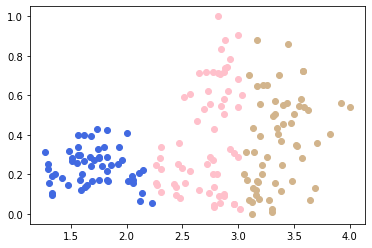

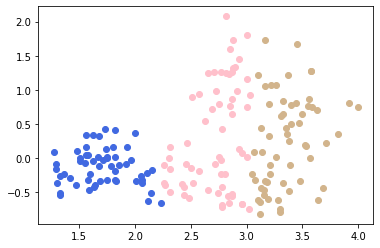

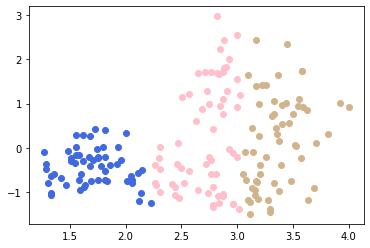

In [30]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# 3
df = pd.read_csv("wine.csv")
wineMinMax = np.array(list(zip(np.array(df["OD_read"]), prep.MinMaxScaler().fit_transform(df)[:,1])))
wineRobust = np.array(list(zip(np.array(df["OD_read"]), prep.RobustScaler().fit_transform(df)[:,1])))
wineStandard = np.array(list(zip(np.array(df["OD_read"]), prep.StandardScaler().fit_transform(df)[:,1])))

colors = ["royalblue", "pink", "tan"]*100

km = KMeans(3).fit_predict(wineMinMax)
for i, point in enumerate(wineMinMax):
    plt.scatter(point[0], point[1], color=colors[km[i]])
plt.show()

ac = AgglomerativeClustering(3).fit_predict(wineRobust)
for i, point in enumerate(wineRobust):
    plt.scatter(point[0], point[1], color=colors[km[i]])
plt.show()

db = DBSCAN(eps=0.1, min_samples=1).fit_predict(wineStandard)
for i, point in enumerate(wineStandard):
    plt.scatter(point[0], point[1], color=colors[km[i]])
plt.show()


In [62]:
from numpy import unique

# 4a

d = ['male', 'female', 'male', 'female', 'female', 'male', 'female']

e = [['dark', 'big'], ['light', 'small'], ['dark', 'normal'], ['light', 'big'], ['dark', 'big'], ['light', 'big'], ['light', 'small']]

def labelEncoder(d):
    if type(d) != list:
        return None
    
    labels = {}
    lc = 1
    result = []
    temp = []
     
    if type(d[0]) != list:    
        for i, label in enumerate(d):
            if labels.__contains__(label):
                result.append(labels[label])
            else:
                labels[label] = lc
                lc += 1
                result.append(labels[label])   
    elif type(d[0][0]) != list:
        for entry in d:
            for subentry in entry:
                if labels.__contains__(subentry):
                    temp.append(labels[subentry])
                else:
                    labels[subentry] = lc
                    lc += 1
                    temp.append(labels[subentry])
            result.append(temp)
            temp = [] 
    print(result)
    
labelEncoder(d)
labelEncoder(e)

print("skle: ", prep.LabelEncoder().fit_transform(d))
#print("skle: ", prep.LabelEncoder().fit_transform(e))

# b
def oneHotEncoder(d):
    unq = unique(d)
    size = len(unq)
    labels = np.zeros((size,size))
    result = {}
    for i, label in enumerate(unq):
        temp = np.zeros((1,size))
        temp[0,i] = 1
        result[unq[i]] = list(temp[0])
    print(result)

oneHotEncoder(d)
oneHotEncoder(e)

print("sklb ", prep.LabelBinarizer().fit_transform(d))
#print("sklb ", prep.LabelBinarizer().fit_transform(e))

[1, 2, 1, 2, 2, 1, 2]
[[1, 2], [3, 4], [1, 5], [3, 2], [1, 2], [3, 2], [3, 4]]
skle:  [1 0 1 0 0 1 0]
{'female': [1.0, 0.0], 'male': [0.0, 1.0]}
{'big': [1.0, 0.0, 0.0, 0.0, 0.0], 'dark': [0.0, 1.0, 0.0, 0.0, 0.0], 'light': [0.0, 0.0, 1.0, 0.0, 0.0], 'normal': [0.0, 0.0, 0.0, 1.0, 0.0], 'small': [0.0, 0.0, 0.0, 0.0, 1.0]}
sklb  [[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
